In [ ]:
# PyTorch Neural Network Classification

# A classification problem involves predicting whether 
# something is one thing or another.


In [ ]:
# What we're going to cover
# Architecture of a classification neural network

In [ ]:
# 1. Make classification data and get it ready

In [4]:
import torch

In [8]:
from sklearn.datasets import make_circles

n_samples=1000

X,y=make_circles(n_samples, noise=0.03, random_state=42)

In [9]:
print(X[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [10]:
print(y[:5])

[1 1 1 1 0]


In [14]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                    "X2":X[:,1],
                    "Lable":y})

In [15]:
circles.head(5)

,X1,X2,Lable
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [18]:
#count
circles.Lable.value_counts()

1    500
0    500
Name: Lable, dtype: int64

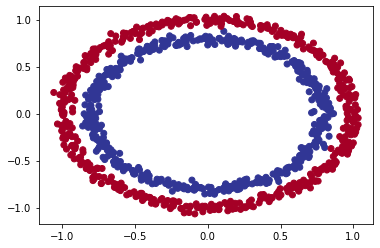

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
           y=X[:,1],
           c=y,
           cmap=plt.cm.RdYlBu);

In [20]:
# 1.1 Input and output shapes

In [22]:
X.shape, y.shape

((1000, 2), (1000,))

In [23]:
X_sample=X[0]
y_sample=y[0]
X_sample, y_sample,X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

In [24]:
# 1.2 Turn data into tensors and create train and test splits

In [25]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [27]:
# 2. Building a model

In [30]:
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [33]:
class CircleModleV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2, out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)
        
    def forward(self,x):
        return self.layer_2(self.layer_1(x))
    
    
model_0=CircleModleV0().to(device)
model_0

CircleModleV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# 2.1 Setup loss function and optimizer

In [34]:
untrained_pred=model_0(X_test.to(device))
print(len(untrained_pred))
print(len(untrained_pred.shape))

200
2


In [35]:
print(y_test[:10])

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [36]:
print(untrained_pred[:10])

tensor([[-0.0615],
        [-0.1423],
        [ 0.0939],
        [-0.1054],
        [ 0.0048],
        [-0.0438],
        [-0.2005],
        [-0.1776],
        [ 0.0975],
        [-0.1487]], grad_fn=<SliceBackward0>)


In [38]:
#SGD 
#adam 
#binary cross antropy
#cross entropy
#MAE or L1 loss
#MSE or L2 loss
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),
                         lr=0.1)

In [ ]:
#evalution matrix

In [39]:
def accuracy_fn(y_true, y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc

In [40]:
# 3. Train model

In [41]:
y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0615],
        [-0.1423],
        [ 0.0939],
        [-0.1054],
        [ 0.0048]], grad_fn=<SliceBackward0>)

In [42]:
#sigmoid fun
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4846],
        [0.4645],
        [0.5235],
        [0.4737],
        [0.5012]], grad_fn=<SigmoidBackward0>)

In [43]:
#if y_pred_probs>=0.5, y=1 (class=1)
#if y_pred_probs<0.5, y=0 (class=0)

In [45]:
y_preds=torch.round(y_pred_probs)
y_pred_lables=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
print(torch.eq(y_preds.squeeze(),y_pred_lables.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 1., 0., 1.], grad_fn=<SqueezeBackward0>)

In [46]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [58]:
# 3.2 Building a training and testing loop

In [62]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 10 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 20 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 30 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69466, Test acc: 45.50%
Epoch: 40 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 50 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 60 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 70 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 80 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%
Epoch: 90 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69467, Test acc: 45.50%


In [63]:
# 4. Make predictions and evaluate the model

In [64]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


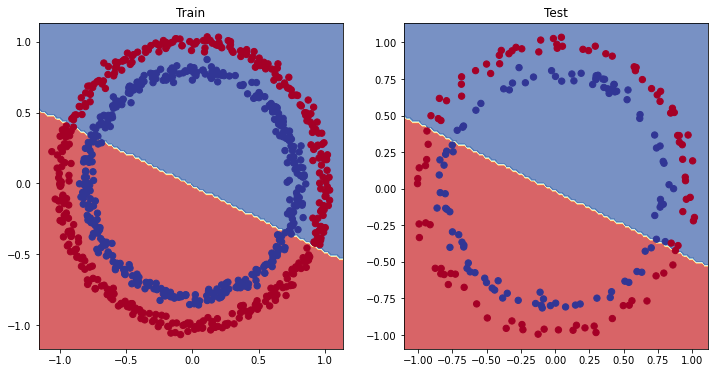

In [65]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [66]:
!pip -q install torchmetrics

from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy().to(device)

# Calculate accuracy
# torchmetrics_accuracy(y_preds, y_test)